In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('Data set2.csv')
df

,date,Inflation,LTIR,Unemployment,STIR,LIBOR,BCTPS,UKUSFX,BDR,HPLR,HCCR
0,1986-01,5.482456,11.1300,11.2,12.86300,8.25,156383.84,1.42,9.70,23.68,26.80
1,1986-02,5.114254,10.7300,11.1,12.71875,7.94,157953.04,1.43,9.99,23.68,26.80
2,1986-03,4.202586,9.6900,11.2,11.77679,7.50,159977.18,1.47,9.14,23.68,26.80
3,1986-04,3.059072,8.9400,11.3,10.57670,6.94,164349.56,1.50,7.82,23.68,26.80
4,1986-05,2.731092,9.1500,11.3,10.26705,7.13,165909.12,1.52,7.48,23.68,26.80
...,...,...,...,...,...,...,...,...,...,...,...
368,2016-09,1.300000,0.8243,4.8,0.37907,0.53,1896169.76,1.31,0.61,4.11,17.94
369,2016-10,1.300000,1.0780,4.8,0.39750,0.62,1892910.57,1.23,0.60,3.75,17.95
370,2016-11,1.500000,1.3818,4.7,0.39773,0.77,1902530.37,1.24,0.46,3.76,17.96
371,2016-12,1.800000,1.4336,4.7,0.37226,0.78,1908201.00,1.25,0.40,3.74,17.96


In [56]:
df.isnull().values.any()

False

In [51]:
df=df.dropna()
df = df.drop(labels=372, axis=0)

In [3]:
df.head()

,date,Inflation,LTIR,Unemployment,STIR,LIBOR,BCTPS,UKUSFX,BDR,HPLR,HCCR
0,1986-01,5.482456,11.13,11.2,12.86300,8.25,156383.84,1.42,9.70,23.68,26.8
1,1986-02,5.114254,10.73,11.1,12.71875,7.94,157953.04,1.43,9.99,23.68,26.8
2,1986-03,4.202586,9.69,11.2,11.77679,7.50,159977.18,1.47,9.14,23.68,26.8
3,1986-04,3.059072,8.94,11.3,10.57670,6.94,164349.56,1.50,7.82,23.68,26.8
4,1986-05,2.731092,9.15,11.3,10.26705,7.13,165909.12,1.52,7.48,23.68,26.8


In [4]:
df.columns.values


array(['date', 'Inflation', 'LTIR', 'Unemployment', 'STIR', 'LIBOR',
       'BCTPS', 'UKUSFX', 'BDR', 'HPLR', 'HCCR'], dtype=object)

In [5]:
df.shape

(372, 11)

In [6]:
df.describe()

,Inflation,LTIR,Unemployment,STIR,LIBOR,BCTPS,UKUSFX,BDR,HPLR,HCCR
count,372.000000,372.000000,372.000000,372.000000,372.000000,3.720000e+02,372.000000,372.000000,372.000000,372.000000
mean,2.812015,5.916865,7.122581,5.672995,3.803495,9.702633e+05,1.637796,3.513683,13.271586,20.282097
std,1.794348,2.878479,1.875556,3.991713,2.800312,5.815179e+05,0.157353,2.914781,6.647735,4.393240
min,0.200000,0.742100,4.700000,0.372260,0.150000,1.563838e+05,1.230000,0.400000,3.740000,14.800000
25%,1.600000,3.973650,5.300000,1.757075,0.530000,4.366761e+05,1.530000,1.067500,7.857500,16.527500
50%,2.400000,5.081650,6.900000,5.558480,4.140000,8.231306e+05,1.610000,2.840000,11.715000,18.270000
75%,3.300000,8.349450,8.300000,7.384032,5.880000,1.691196e+06,1.720000,3.720000,19.550000,23.040000
max,9.200000,12.740000,11.300000,15.316760,10.060000,1.908201e+06,2.070000,11.820000,26.550000,29.940000


In [7]:
corr = df.corr() 

Text(0.5, 1.0, 'Correlation matrix')

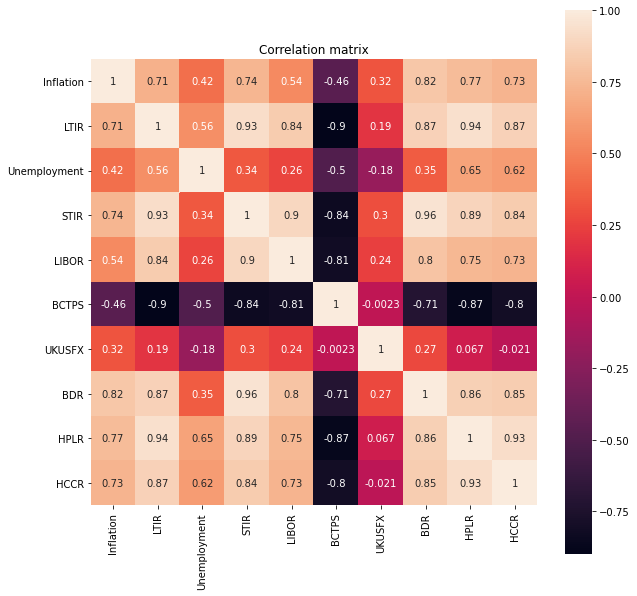

In [8]:
#Plotting the Correlation Matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=1, square=True,annot=True)
plt.title('Correlation matrix')

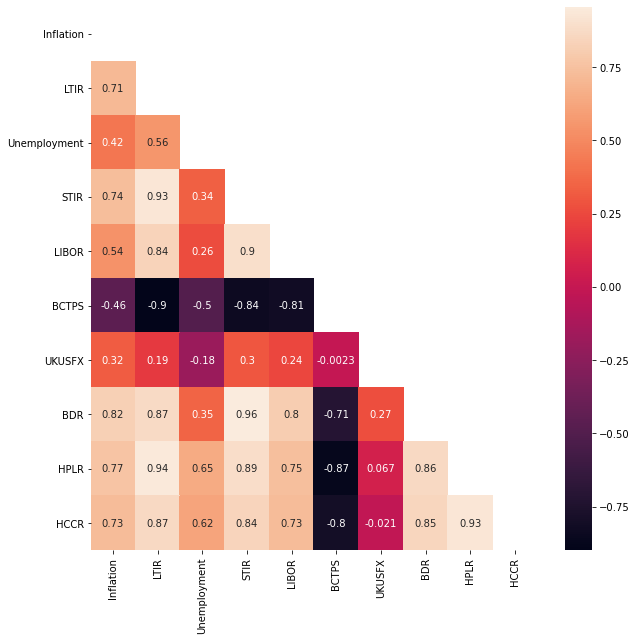

In [9]:
mask = np.triu(np.ones_like(df.corr()))
plt.figure(figsize=(10,10))
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(df.corr(), annot=True, mask=mask)
 
# displaying heatmap
plt.show()

In [10]:
cor_target = abs(corr["STIR"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5].sort_values(ascending = False)
relevant_features

STIR         1.000000
BDR          0.955863
LTIR         0.930719
LIBOR        0.896387
HPLR         0.886444
HCCR         0.842532
BCTPS        0.837870
Inflation    0.735556
Name: STIR, dtype: float64

In [57]:
df2 = df['STIR']
#df['Date'] = pd.PeriodIndex(df.date, freq='M').to_timestamp()
#df = df.set_index(['Date'])
#df = df.drop(['date'],axis=1)

df1 = df[['HPLR','BDR','LTIR','BCTPS','LIBOR','Inflation','HCCR']]

In [58]:
df1.head()

,HPLR,BDR,LTIR,BCTPS,LIBOR,Inflation,HCCR
0,23.68,9.70,11.13,156383.84,8.25,5.482456,26.8
1,23.68,9.99,10.73,157953.04,7.94,5.114254,26.8
2,23.68,9.14,9.69,159977.18,7.50,4.202586,26.8
3,23.68,7.82,8.94,164349.56,6.94,3.059072,26.8
4,23.68,7.48,9.15,165909.12,7.13,2.731092,26.8


In [13]:
features = ['HPLR','BDR','LTIR','BCTPS','LIBOR','Unemployment','Inflation','HCCR']

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df1)
data_rescaled = scaler.transform(df1)

In [60]:
#95% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

In [61]:
reduced

array([[ 4.3443149 ,  0.21465512,  0.36635691],
       [ 4.21863481,  0.14361308,  0.31236714],
       [ 3.73417587, -0.19671787,  0.08045211],
       ...,
       [-3.12355291,  0.50344049,  0.03506025],
       [-3.04827085,  0.55177981,  0.06302553],
       [-2.99762211,  0.67115262,  0.07543254]])

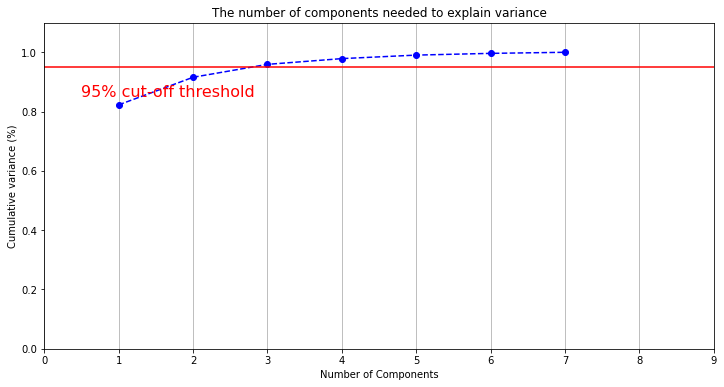

In [62]:
from sklearn.decomposition import PCA
pca = PCA().fit(data_rescaled)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 8, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 10, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [63]:
dr_df = pd.DataFrame(data_rescaled)
dr_df = dr_df.rename({0 : 'HPLR',1: 'BDR',2: 'LTIR',3: 'BCTPS',4: 'LIBOR',5: 'Inflation',6: 'HCCR'},axis=1)
dr_df.head()

,HPLR,BDR,LTIR,BCTPS,LIBOR,Inflation,HCCR
0,1.567817,2.125253,1.813512,-1.401463,1.589999,1.490256,1.485619
1,1.567817,2.224880,1.674363,-1.398761,1.479148,1.284779,1.485619
2,1.567817,1.932870,1.312574,-1.395275,1.321811,0.776017,1.485619
3,1.567817,1.479396,1.051669,-1.387746,1.121564,0.137871,1.485619
4,1.567817,1.362592,1.124722,-1.385061,1.189505,-0.045160,1.485619


In [64]:
pca.explained_variance_ratio_

array([0.82262553, 0.09304908, 0.04361752, 0.01936617, 0.01184912,
       0.00585945, 0.00363313])

In [65]:
evr = pd.DataFrame(data = pca.explained_variance_ratio_,columns = ['Variance'])
evr
Name = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7']#,'PC9']
evr[' ']  = Name
evr = evr.set_index(' ')
evr
#evrd = pd.DataFrame(evr)

,Variance
,
PC1,0.822626
PC2,0.093049
PC3,0.043618
PC4,0.019366
PC5,0.011849
PC6,0.005859
PC7,0.003633


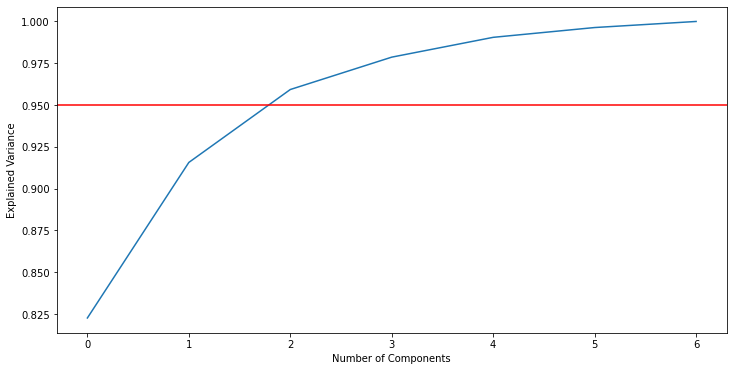

In [66]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='-')


In [67]:
print('\nInformation (Variance) attributed by each Principal Component ')
print('Variance explained by First Princiapal Component = ',np.cumsum(pca.explained_variance_ratio_*100)[0])
print('Variance explained by First 2 Princiapal Components = ',np.cumsum(pca.explained_variance_ratio_*100)[1])
print('Variance explained by First 3 Princiapal Components = ',np.cumsum(pca.explained_variance_ratio_*100)[2])
print('Variance explained by First 4 Princiapal Components = ',np.cumsum(pca.explained_variance_ratio_*100)[3])
#print('Variance explained by First 5 Princiapal Components = ',np.cumsum(pca.explained_variance_ratio_*100)[4])


Information (Variance) attributed by each Principal Component 
Variance explained by First Princiapal Component =  82.26255307413193
Variance explained by First 2 Princiapal Components =  91.56746106409777
Variance explained by First 3 Princiapal Components =  95.9292127418822
Variance explained by First 4 Princiapal Components =  97.86582999720484


In [68]:
pca_3 = PCA(n_components = 3)
pca_3.fit(data_rescaled)
reduced_3 = pca_3.transform(data_rescaled)

In [69]:
#We are splitting each principal Component 
pc_1 = reduced_3[:,0]
pc_2 = reduced_3[:,1]
pc_3 = reduced_3[:,2]

Text(0, 0.5, 'Princiapl Component 2')

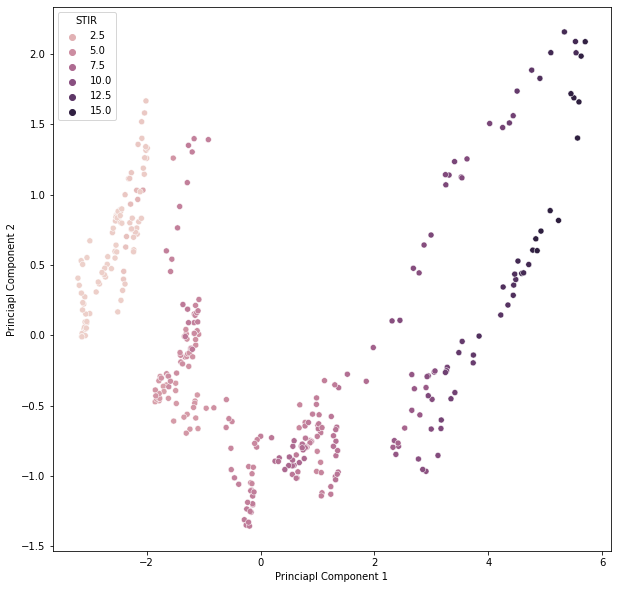

In [70]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = pc_1, y = pc_2,hue=df.STIR)
plt.xlabel('Princiapl Component 1')
plt.ylabel('Princiapl Component 2')


In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = pc_1, y = pc_3,hue=df.STIR)
plt.xlabel('Princiapl Component 1')
plt.ylabel('Princiapl Component 3')


In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = pc_1, y = pc_4,hue=df.STIR)
plt.xlabel('Princiapl Component 1')
plt.ylabel('Princiapl Component 4')


In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = pc_2, y = pc_3,hue=df.STIR)
plt.xlabel('Princiapl Component 2')
plt.ylabel('Princiapl Component 3')


In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = pc_2, y = pc_4,hue=df.STIR)
plt.xlabel('Princiapl Component 2')
plt.ylabel('Princiapl Component 4')


In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = pc_3, y = pc_4,hue=df.STIR)
plt.xlabel('Princiapl Component 3')
plt.ylabel('Princiapl Component 4')


In [45]:
pca_data = pd.DataFrame(data = reduced_4,columns = ['PC1','PC2','PC3'])
pca_data

,PC1,PC2,PC3
0,4.344315,0.214655,0.366357
1,4.218635,0.143613,0.312367
2,3.734176,-0.196718,0.080452
3,3.168316,-0.663540,-0.253943
4,3.115803,-0.855119,-0.264259
...,...,...,...
367,-3.206819,0.405876,-0.013220
368,-3.150533,0.530059,0.000323
369,-3.123553,0.503440,0.035060
370,-3.048271,0.551780,0.063026


Each data point contains the read count of PC1 and PC2

P1 Cell score = read count*influence of  1st variable on pc + read count*influence of  1st variable on pc + .....

# Regression

In [71]:
#define predictor and response variables
X = pca_data
y = df2

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [74]:
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
reg = LinearRegression()  
# fitting the training data
reg.fit(x_train, y_train)
#Intercept and Coefficient
print("Intercept: ", reg.intercept_)
print('')
print("Coefficients:",reg.coef_)

#LR.fit(x_train,y_train)
#y_prediction =  LR.predict(x_test)

Intercept:  5.665480903564735

Coefficients: [ 1.57507835 -0.18331354  1.38267759]


In [ ]:
y_test

In [75]:
y_pred = reg.predict(x_test)

#Predicted values
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [ 5.65922956  0.98806706  5.94777399  5.62067151  1.3122792   5.75239277
 10.00844772  9.45241078  2.57841597  6.90920558  5.5563245   2.78169813
  5.91124935  3.08217623  5.69362828  5.34317845  0.56773103 10.26993641
  1.50765581  0.45352134  3.07802356  1.13676773  1.11193963  6.79654791
  4.07845174  4.819735    2.70417545 10.36448428  6.34741433  1.45156827
  0.74417515  1.88606634  5.93245996  4.33987765  8.12176581  6.19183114
  1.21859656  7.51543001 13.72726771  1.73840747  0.97118921  3.86568572
  6.27079506  1.47218781  0.4475105   0.52672594  2.96513137  6.88193361
  0.59126581  1.82242207  7.39759361  5.74079186  0.92795055  1.96895873
  0.52180882  0.85021076  6.96700247  2.5972982   0.92525873 10.66040793
 13.95138639  5.13165481  6.95903157  3.74064692  8.64673821  7.10645905
  0.60642379  1.11950349  1.29479409  6.86321538  3.35809891  6.19424344
  1.20556687 11.85701818 12.99733508  1.35377284  6.85407008  5.08514516
  4.40523225  6.5897435   

In [76]:
#Actual value and the predicted value
#Actual value and the predicted value

reg_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})

#reg_diff['counter'] = range(len(reg_diff))

reg_diff

,Actual value,Predicted value
251,5.29167,5.659230
338,0.52157,0.988067
86,6.03193,5.947774
159,5.31773,5.620672
325,0.50988,1.312279
...,...,...
46,15.15412,13.886963
132,6.41491,6.761607
158,5.42287,5.693602
349,0.56363,0.464768


In [77]:
#Model Evaluation
from sklearn import metrics
from sklearn.metrics import r2_score
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared:',r2_score(y_test, y_pred))
print('Mean Absolute Error:', MAE)
print('Mean Square Error:', MSE)
print('Root Mean Square Error:', RMSE)

R squared: 0.9571925497448368
Mean Absolute Error: 0.6211424840313272
Mean Square Error: 0.6297328660598926
Root Mean Square Error: 0.7935570969123096


Text(0.5, 1.0, 'Linear Regression Using PCA')

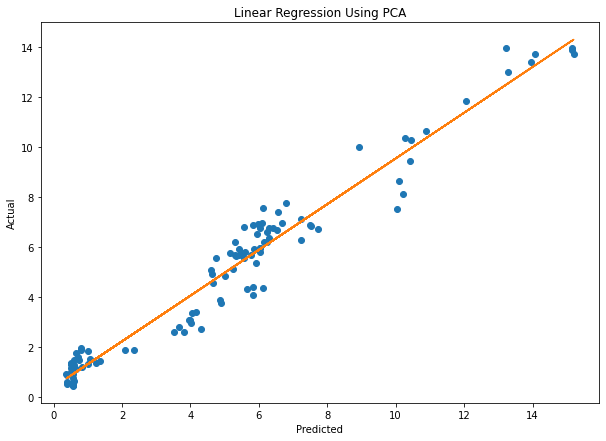

In [79]:
plt.figure(figsize=(10,7))

plt.plot(y_test, y_pred, 'o')


m, b = np.polyfit(y_test, y_pred, 1)

#m = slope, b=intercept


plt.plot(y_test, m*y_test + b)#,xlab="predicted",ylab="actual")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Linear Regression Using PCA')

#add line of best fit




In [38]:
import statsmodels.api as sm

In [39]:
#x2 = reg_diff['Actual value'].tolist()
#y2 = reg_diff['Predicted value'].tolist()
 
# adding the constant term
#xwc = sm.add_constant(x_train)
 
# performing the regression
# and fitting the model
result = sm.OLS(y_train,sm.add_constant(x_train)).fit()
 
# printing the summary table
print(result.summary())
result.rsquared

                            OLS Regression Results                            
Dep. Variable:                   STIR   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1842.
Date:                Tue, 31 May 2022   Prob (F-statistic):          6.59e-173
Time:                        11:52:10   Log-Likelihood:                -318.53
No. Observations:                 260   AIC:                             645.1
Df Residuals:                     256   BIC:                             659.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7119      0.052    110.727      0.0

0.9557144006711638

In [ ]:
xwc

In [ ]:
y_train